In [138]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
from datetime import datetime

In [139]:
def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2021, 11, 13), end=datetime.now()).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["GME","AMC", "BBBY"] 
data = get_historical_Data(ticks)
print(data.shape)
# Most Recent Data
data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
(399, 3)


,GME,AMC,BBBY
Date,,,
2023-06-12,24.299999,4.79,0.2199
2023-06-13,26.950001,5.00,0.2137
2023-06-14,25.700001,4.90,0.1811
2023-06-15,24.840000,4.76,0.1950
2023-06-16,24.559999,4.70,0.2279


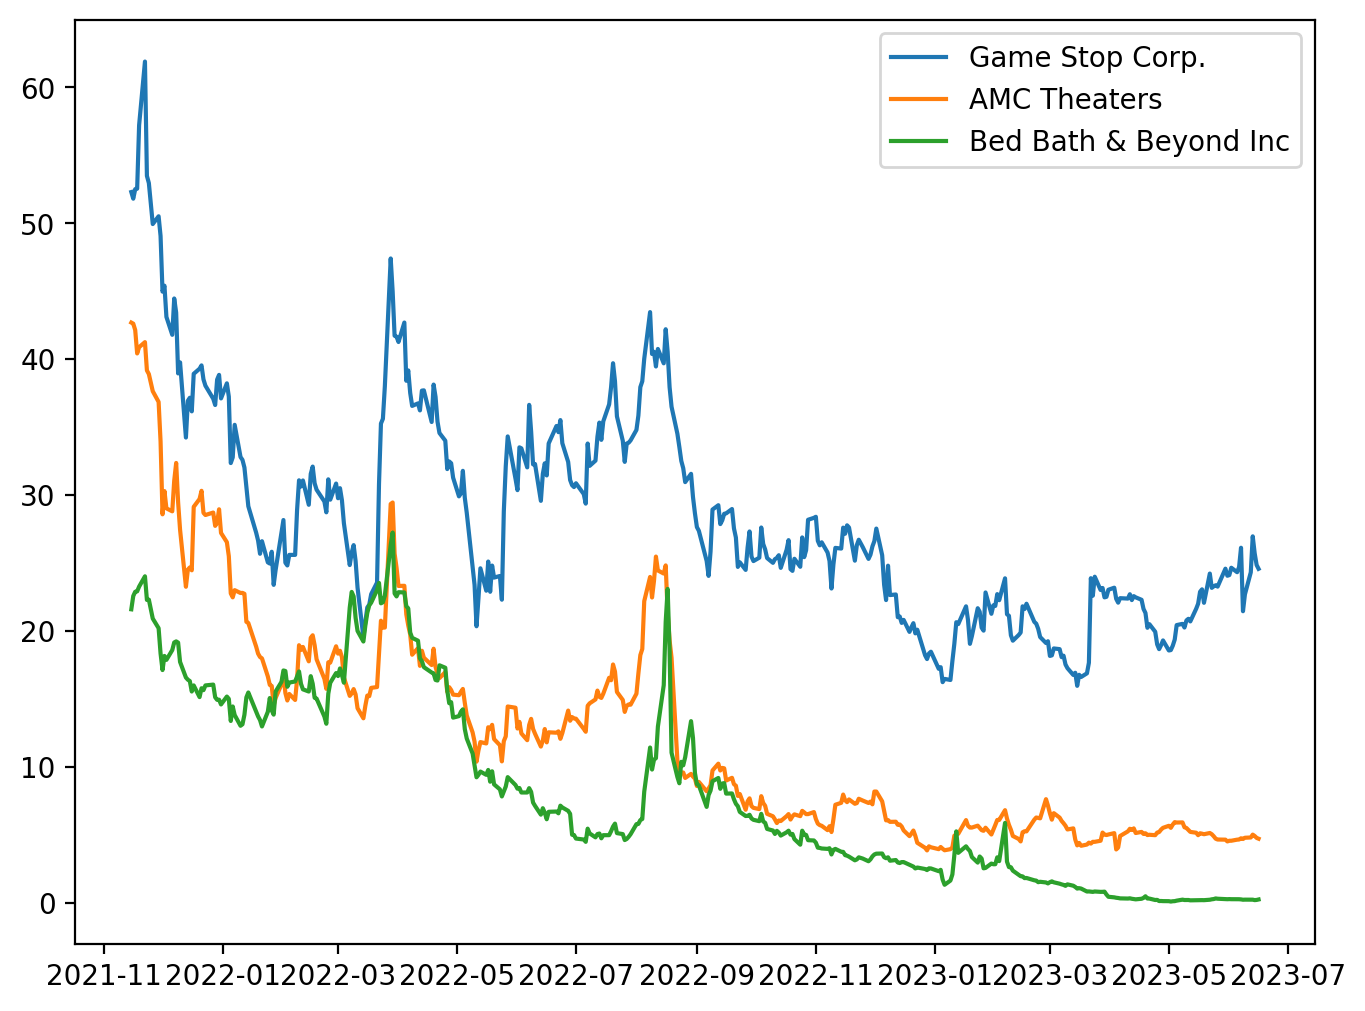

In [140]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
GME = data['GME']
AMC = data['AMC']
BBBY = data['BBBY']


plt.plot(GME, label = "Game Stop Corp.")
plt.plot(AMC, label = "AMC Theaters")
plt.plot(BBBY, label = "Bed Bath & Beyond Inc")
plt.legend()

In [141]:
d = data.pct_change()[1:] # Converting to get percentage changes, 1: removes the first NaN element.
AMC = d['AMC']
AMC.values, AMC.mean()

(array([-1.87445713e-03, -1.10328034e-02, -4.08260427e-02,  1.13832983e-02,
         9.05316262e-03, -5.04365118e-02, -6.89480232e-03, -3.23990317e-02,
        -2.09939116e-02, -7.87188250e-02, -1.58220364e-01,  5.98530280e-02,
        -4.19418900e-02, -7.58356814e-03,  7.81521337e-02,  4.22035283e-02,
        -8.93353795e-02, -6.85675021e-02, -1.53061249e-01,  5.42168779e-02,
         6.53060602e-03, -8.51577801e-03,  1.91002042e-01,  1.99175792e-02,
         2.02019683e-02, -5.34653126e-02, -5.57879518e-03,  6.31137105e-03,
        -3.41463911e-02,  8.29731080e-03,  3.54203844e-02, -6.01243863e-02,
        -2.50000105e-02, -3.88386376e-02, -1.07493127e-01, -1.27472930e-02,
         2.35975382e-02, -9.13436653e-03,  4.38991597e-04, -3.07159278e-03,
        -9.06689933e-02, -4.35625137e-03, -8.41030417e-02, -2.76008733e-02,
        -1.36462884e-02, -5.53405552e-03, -7.40122412e-02, -3.72595526e-02,
        -4.99381243e-03, -8.90840125e-02,  3.71900788e-02,  6.64009972e-02,
         4.9

<h1>Rate of change</h1>

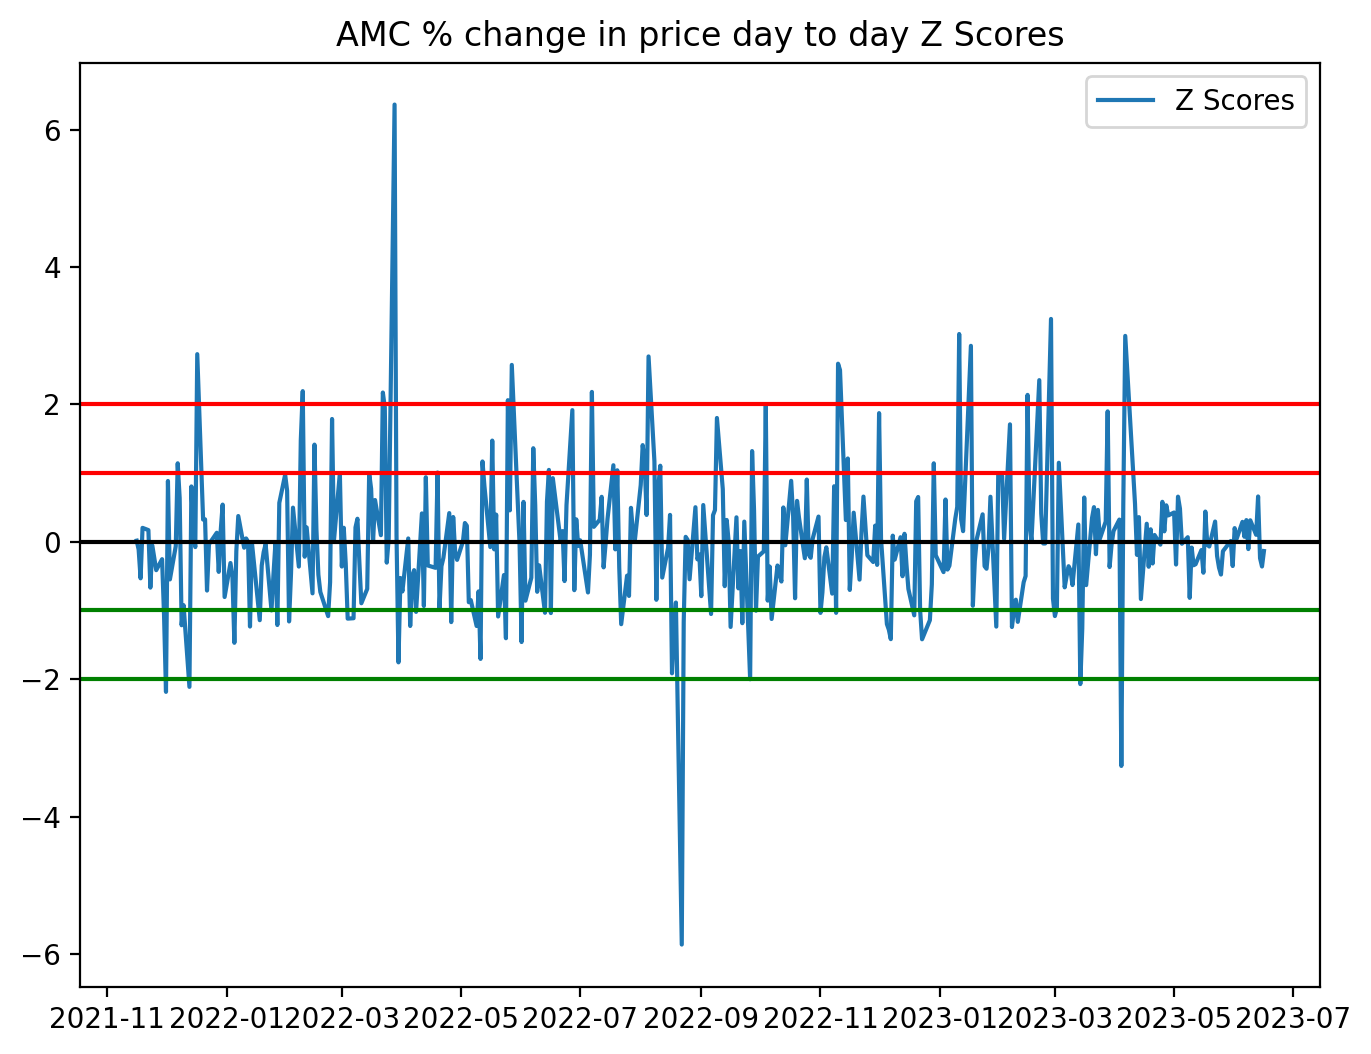

In [142]:
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (AMC - AMC.mean())/AMC.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(2.0, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-2.0, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('AMC % change in price day to day Z Scores')
plt.show()

In [143]:
data_mi = data.diff(10)
data_mi

,GME,AMC,BBBY
Date,,,
2021-11-15,NaN,NaN,NaN
2021-11-16,NaN,NaN,NaN
2021-11-17,NaN,NaN,NaN
2021-11-18,NaN,NaN,NaN
2021-11-19,NaN,NaN,NaN
...,...,...,...
2023-06-12,1.049999,0.15,-0.0626
2023-06-13,2.380001,0.37,-0.0421
2023-06-14,1.650002,0.40,-0.0667


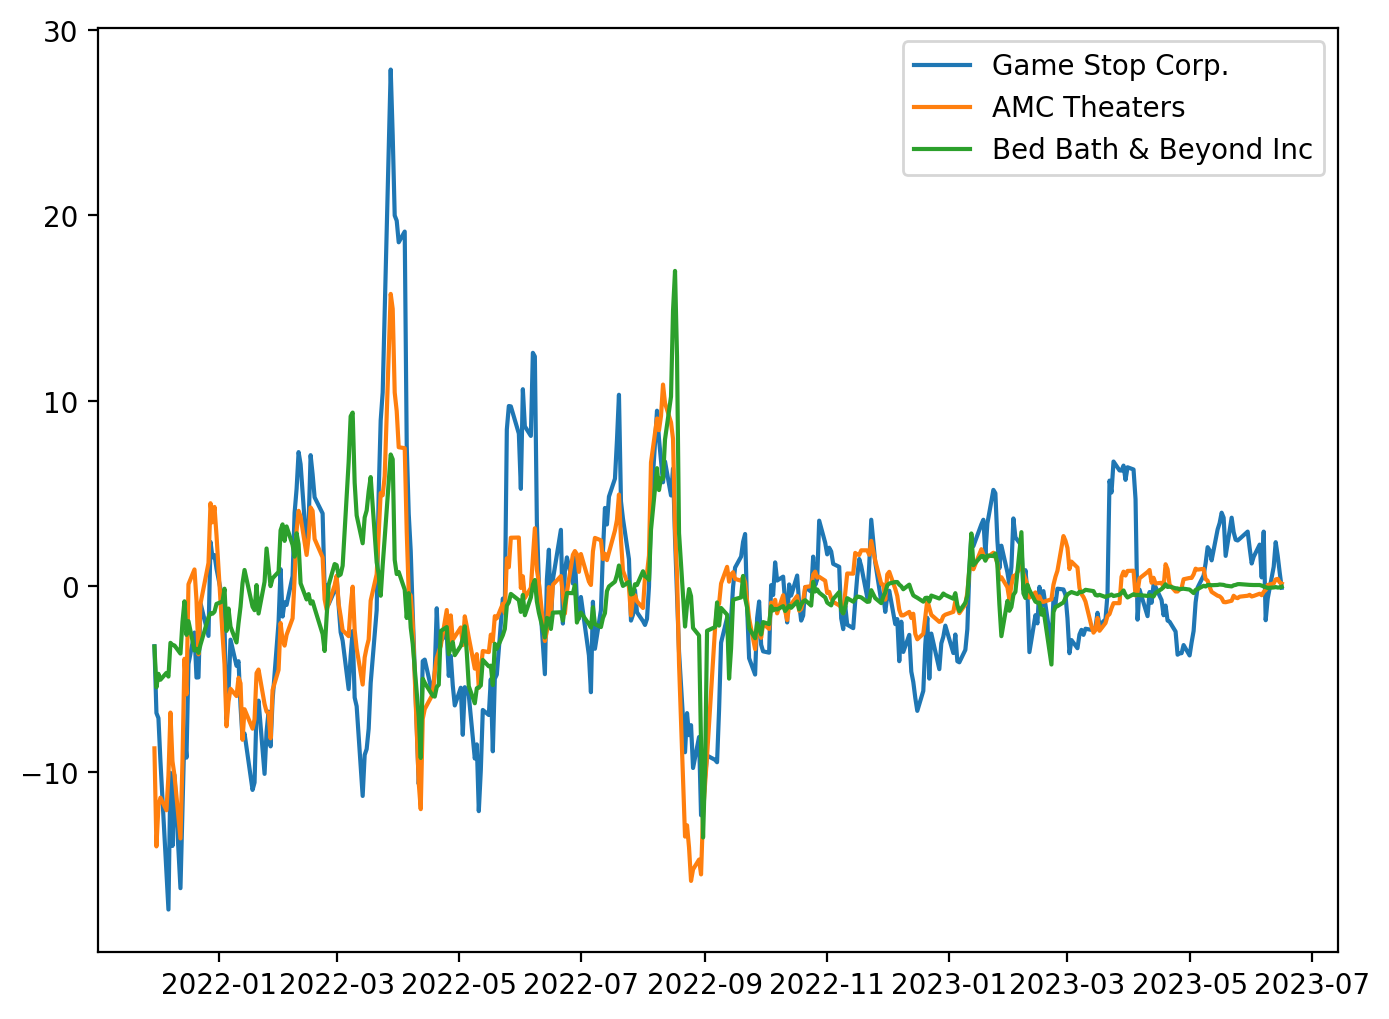

In [144]:
figure(figsize=(8, 6), dpi=200)
GME = data_mi['GME']
AMC = data_mi['AMC']
BBBY = data_mi['BBBY']

plt.plot(GME, label = "Game Stop Corp.")
plt.plot(AMC, label = "AMC Theaters")
plt.plot(BBBY, label = "Bed Bath & Beyond Inc")
plt.legend() 

In [145]:
data_mi

,GME,AMC,BBBY
Date,,,
2021-11-15,NaN,NaN,NaN
2021-11-16,NaN,NaN,NaN
2021-11-17,NaN,NaN,NaN
2021-11-18,NaN,NaN,NaN
2021-11-19,NaN,NaN,NaN
...,...,...,...
2023-06-12,1.049999,0.15,-0.0626
2023-06-13,2.380001,0.37,-0.0421
2023-06-14,1.650002,0.40,-0.0667


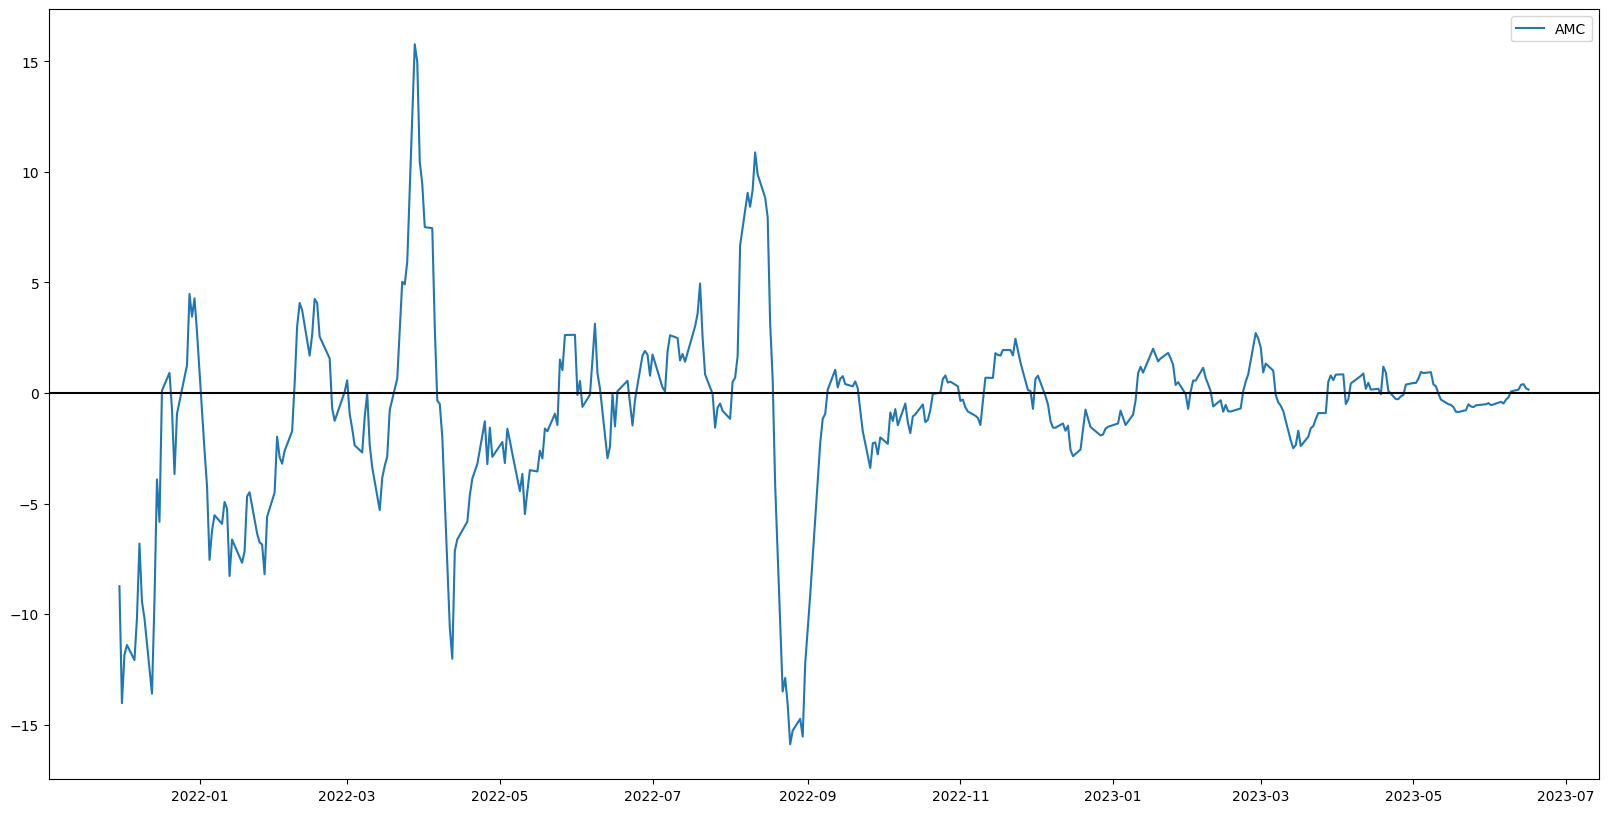

In [146]:
plt.plot(AMC, label = "AMC")
plt.axhline(0, color="black")
# plt.plot(AMC, label = "AMC Theaters")
# plt.plot(BBBY, label = "Bed Bath & Beyond Inc")
plt.legend() 

#above the '0' line is considered bullish momentum and anything below the '0' line is bearish momentum


<h4>Take trade against the trend when it falls out of the 95% range</h4>

<h1>Stochastic Oscillator Strategy</h1>

$$ \%K = \frac {\left( \text{Most recent closing price} - \text{lowest traded price of X previous sessions} \right)} {\left( \text{Highest price of X previous sessions} - \text{lowest traded price of X previous sessions} \right)} * 100 $$

<li>%D = Moving average of 3 period of %K</li>
<li> 14 or 20 days period for X </li>

In [147]:
#https://www.learnpythonwithrune.org/pandas-calculate-the-stochastic-oscillator-indicator-for-stocks/

#if %K > %D, Buy signal
#if %k < %D, Sell signal

#if below 20 the stock is oversold 
#if above 80 the stock is overbought

aapl = yf.download('AAPL', start=datetime(2021, 6, 1), end=datetime.now())
aapl

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,125.080002,125.349998,123.940002,124.279999,122.840477,67637100
2021-06-02,124.279999,125.239998,124.050003,125.059998,123.611443,59278900
2021-06-03,124.680000,124.849998,123.129997,123.540001,122.109055,76229200
2021-06-04,124.070000,126.160004,123.849998,125.889999,124.431831,75169300
2021-06-07,126.169998,126.320000,124.830002,125.900002,124.441719,71057600
...,...,...,...,...,...,...
2023-06-12,181.270004,183.889999,180.970001,183.789993,183.789993,54274900
2023-06-13,182.800003,184.149994,182.440002,183.309998,183.309998,54929100
2023-06-14,183.369995,184.389999,182.020004,183.949997,183.949997,57462900


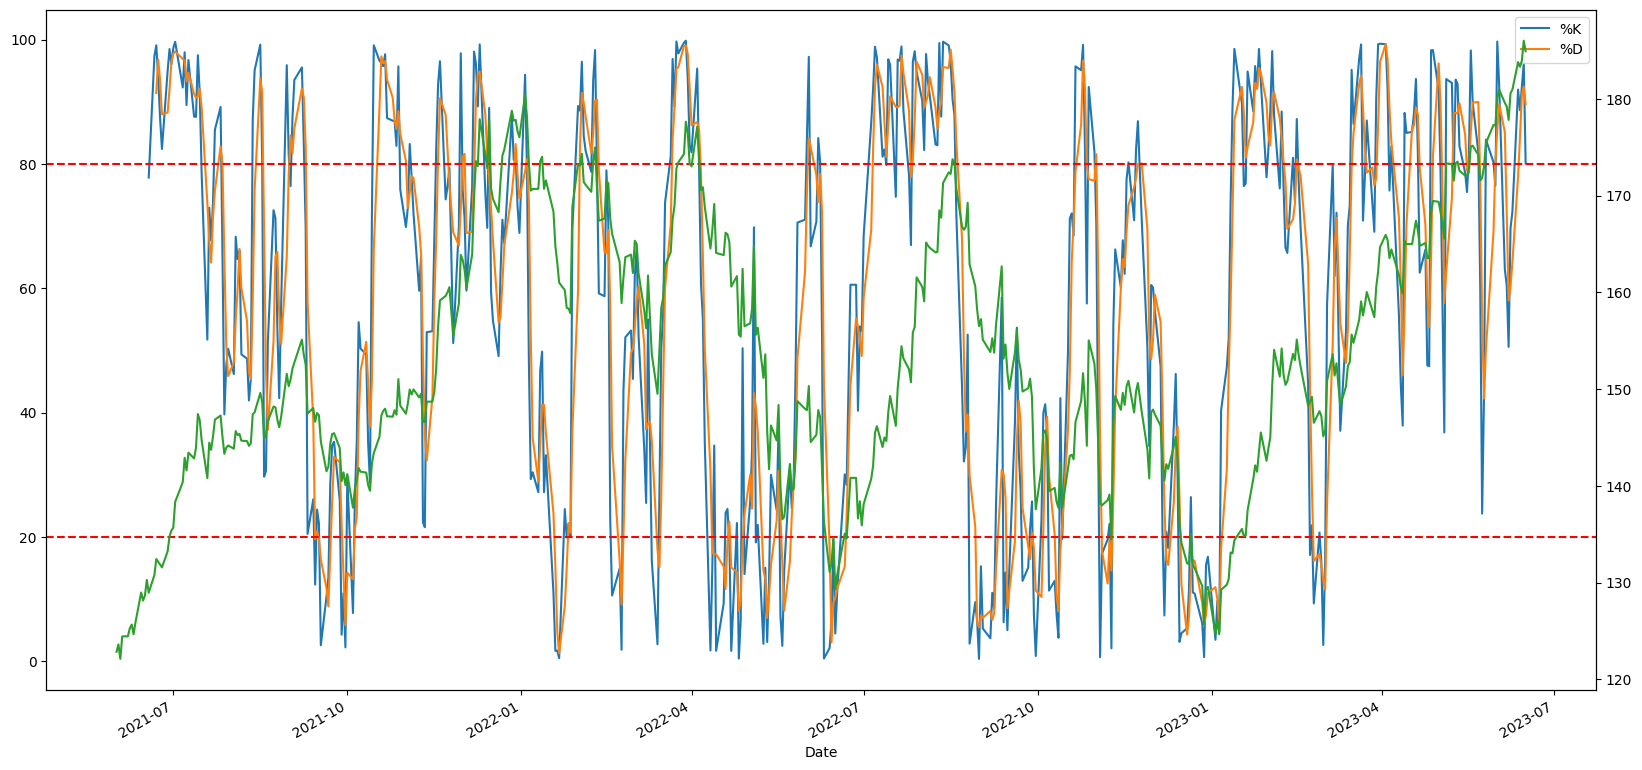

<Figure size 2000x1000 with 0 Axes>

In [148]:
aapl['14-high'] = aapl['High'].rolling(14).max()
aapl['14-low'] = aapl['Low'].rolling(14).min()
aapl['%K'] = (aapl['Close'] - aapl['14-low'])*100/(aapl['14-high'] - aapl['14-low'])
aapl['%D'] = aapl['%K'].rolling(3).mean()
ax = aapl[['%K', '%D']].plot()
aapl['Adj Close'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.figure(figsize=(20,10))
plt.show()


In [149]:
aapl

,Open,High,Low,Close,Adj Close,Volume,14-high,14-low,%K,%D
Date,,,,,,,,,,
2021-06-01,125.080002,125.349998,123.940002,124.279999,122.840477,67637100,NaN,NaN,NaN,NaN
2021-06-02,124.279999,125.239998,124.050003,125.059998,123.611443,59278900,NaN,NaN,NaN,NaN
2021-06-03,124.680000,124.849998,123.129997,123.540001,122.109055,76229200,NaN,NaN,NaN,NaN
2021-06-04,124.070000,126.160004,123.849998,125.889999,124.431831,75169300,NaN,NaN,NaN,NaN
2021-06-07,126.169998,126.320000,124.830002,125.900002,124.441719,71057600,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-06-12,181.270004,183.889999,180.970001,183.789993,183.789993,54274900,184.949997,170.520004,91.961163,77.985705
2023-06-13,182.800003,184.149994,182.440002,183.309998,183.309998,54929100,184.949997,170.520004,88.634787,84.315092
2023-06-14,183.369995,184.389999,182.020004,183.949997,183.949997,57462900,184.949997,171.690002,92.458519,91.018156


<h1>Relative strenght index (RSI)</h1>

In [150]:
# RSI = 100 - [100 / (1+ (AverageGain / AverageLoss))]

#RSI > 70 stock is overbought
#RSI < 30 Stock is oversold

import pandas_ta as pta
aapl['rsi'] = pta.rsi(aapl['Adj Close'], lenght = 14)
aapl['rsi']

Date
2021-06-01          NaN
2021-06-02          NaN
2021-06-03          NaN
2021-06-04          NaN
2021-06-07          NaN
                ...    
2023-06-12    71.981921
2023-06-13    70.202709
2023-06-14    71.224027
2023-06-15    74.279859
2023-06-16    70.041498
Name: rsi, Length: 516, dtype: float64

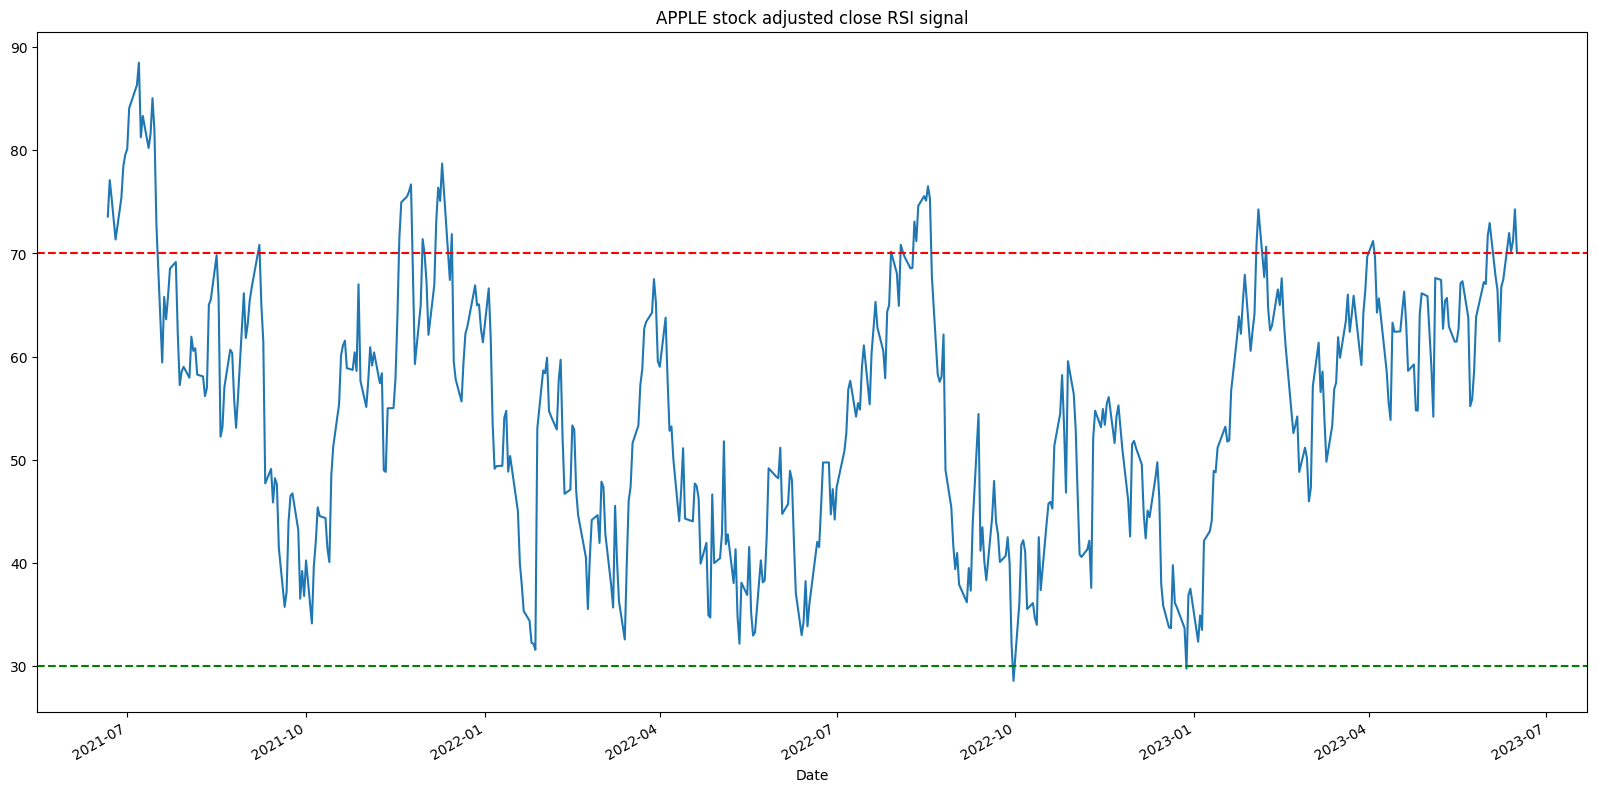

<Figure size 2000x1000 with 0 Axes>

In [151]:
aapl['rsi'].plot()
plt.title('APPLE stock adjusted close RSI signal')
plt.axhline(30, linestyle='--', color='g')
plt.axhline(70, linestyle='--', color='r')
plt.figure(figsize=(20,10))
plt.show()

<h1>Moving Average Convergence Divergence (MACD)</h1>
<li>Subtract 26 period EMA from 12 period EMA</li>
<li>Exponential Moving Average (EMA): weighted average where more weight is put on more recent data</li>

$$ EMA_{\text{Today}} = \left(Value_{\text{Today}} * \left(\frac{Smoothing}{1 + Days}\right) \right) + EMA_{\text{Yesterday}} * \left( 1- \frac{Smoothing}{1 + Days}\right) $$

<p> Usually: </p>
<p> Smoothing = 2 </p>

<h3>3 Main Components </h3>
<li>MACD Line: (26 EMA - 12 EMA)</li>
<li>Signal Line: 9 period EMA of MACD Values</li>
<li>Histogram Line: MACD - Signal Line</li>

In [152]:
import stockstats 
from stockstats import wrap
BBBY = yf.download("BBBY", datetime(2021, 10, 29), datetime.now())
BBBY

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-29,14.450000,14.730000,13.975000,14.040000,14.040000,5413964
2021-11-01,14.170000,15.380000,14.120000,15.280000,15.280000,8371370
2021-11-02,15.570000,16.805000,14.800000,16.750000,16.750000,45906175
2021-11-03,25.635000,25.719999,19.200001,19.299999,19.299999,104964256
2021-11-04,20.082199,20.719999,19.170000,20.170000,20.170000,15877015
...,...,...,...,...,...,...
2023-06-12,0.224500,0.230000,0.216500,0.219900,0.219900,12209157
2023-06-13,0.219900,0.229000,0.192000,0.213700,0.213700,16049714
2023-06-14,0.197000,0.210000,0.173600,0.181100,0.181100,23357371


In [153]:
BBBY = wrap(BBBY)
BBBY

,open,high,low,close,adj close,volume
Date,,,,,,
2021-10-29,14.450000,14.730000,13.975000,14.040000,14.040000,5413964
2021-11-01,14.170000,15.380000,14.120000,15.280000,15.280000,8371370
2021-11-02,15.570000,16.805000,14.800000,16.750000,16.750000,45906175
2021-11-03,25.635000,25.719999,19.200001,19.299999,19.299999,104964256
2021-11-04,20.082199,20.719999,19.170000,20.170000,20.170000,15877015
...,...,...,...,...,...,...
2023-06-12,0.224500,0.230000,0.216500,0.219900,0.219900,12209157
2023-06-13,0.219900,0.229000,0.192000,0.213700,0.213700,16049714
2023-06-14,0.197000,0.210000,0.173600,0.181100,0.181100,23357371


In [154]:
# macd line ---> 26 EMA - 12 EMA
macd = BBBY['macd']
macd

Date
2021-10-29    0.000000
2021-11-01    0.027821
2021-11-02    0.081033
2021-11-03    0.195317
2021-11-04    0.287924
                ...   
2023-06-12   -0.014825
2023-06-13   -0.015067
2023-06-14   -0.017685
2023-06-15   -0.018426
2023-06-16   -0.016172
Name: macd, Length: 410, dtype: float64

In [155]:
# signal line = EMA of 9 period of the MACD values
macds = BBBY['macds']
macds

Date
2021-10-29    0.000000
2021-11-01    0.015456
2021-11-02    0.042332
2021-11-03    0.094156
2021-11-04    0.151798
                ...   
2023-06-12   -0.020902
2023-06-13   -0.019735
2023-06-14   -0.019325
2023-06-15   -0.019145
2023-06-16   -0.018551
Name: macds, Length: 410, dtype: float64

In [156]:
# histogram line = MACD - Signal Line
macdh = BBBY['macdh'] 
macdh

Date
2021-10-29    0.000000
2021-11-01    0.012365
2021-11-02    0.038702
2021-11-03    0.101161
2021-11-04    0.136126
                ...   
2023-06-12    0.006077
2023-06-13    0.004668
2023-06-14    0.001640
2023-06-15    0.000719
2023-06-16    0.002379
Name: macdh, Length: 410, dtype: float64

In [157]:
def plot_macd(prices, macd, signal, hist):
   
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (6,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

<li>If MACD line > Signal line, Buy</li>
<li>If MACD line < Signal line, Sell</li>
<li>The histogram tells when there is bearish or bullish momentum</li>
<li>When the histogram is flat there might be a trend</li>

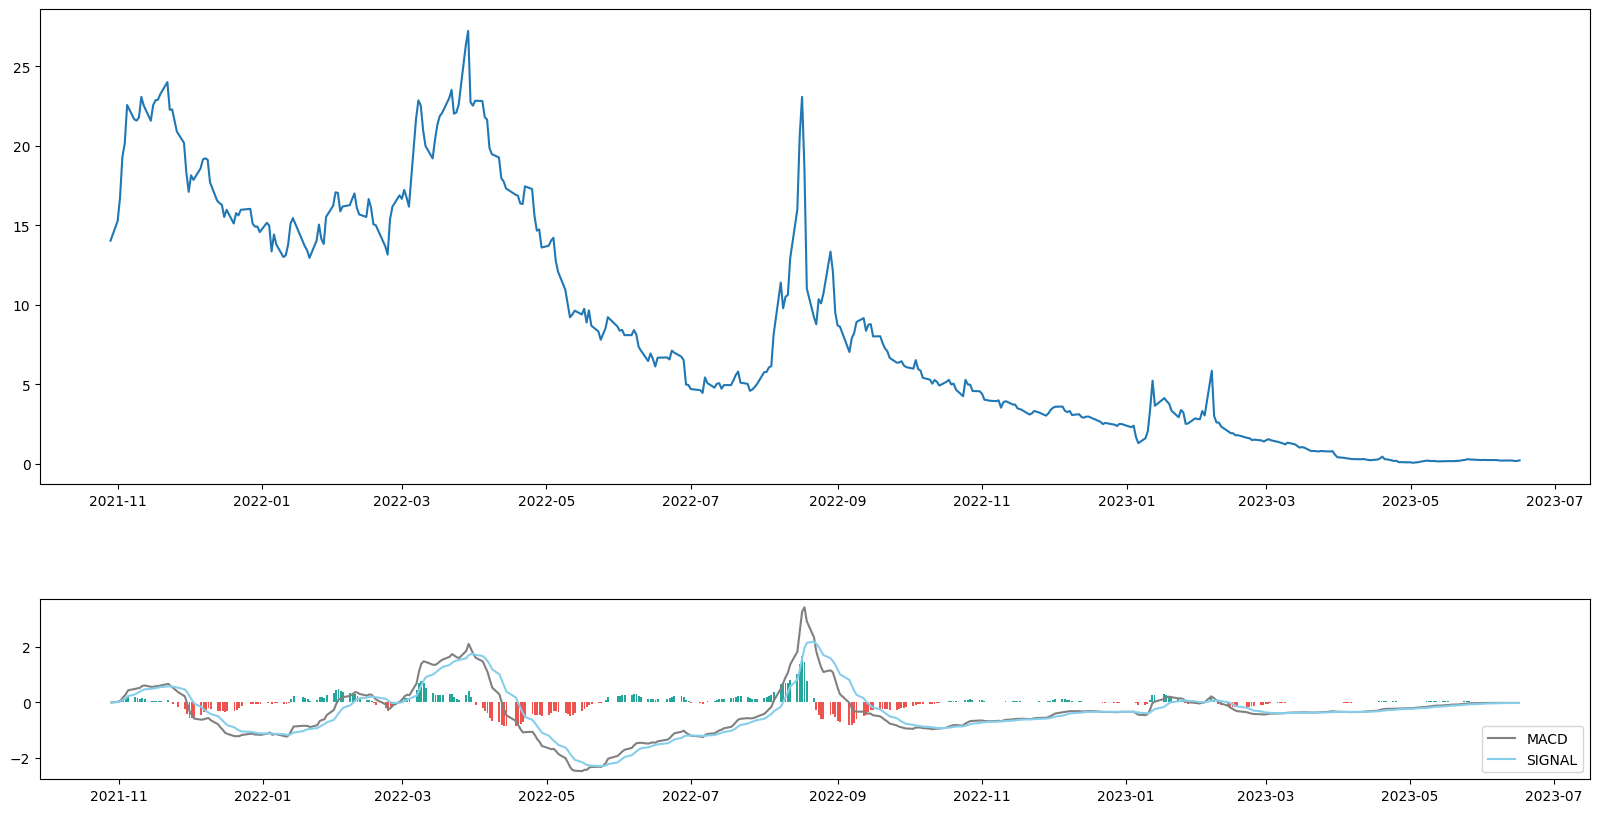

In [158]:
plt.figure(figsize=(20,10))
plot_macd(prices = BBBY['adj close'], macd = macd, signal = macds, hist =  macdh)